# Test Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from unified_regression import LogisticRegression as MyLogisticRegression

In [2]:
# Load the iris dataset and put it in a pandas dataframe
iris = load_iris()
X = iris.data
y = iris.target
df_features = pd.DataFrame(X, columns=iris.feature_names)
df_labels = pd.DataFrame(y, columns=["species"])

## Understand the Data

Look at both the features and labels. There are 150 observations in the dataset. Some point to note are:
1. High correlation between: 
   - petal width and sepal length
   - petal width and petal length
   - petal length and sepal length
2. Feature distribution are not uniform
3. Descriptive characterstics are:
   - sepal length (cm): (4.3-7.9), mean=5.84, std=0.83
   - sepal width (cm): (2.0-4.4), mean=3.06, std=0.44
   - petal length (cm): (1.0-6.9), mean=3.76, std=1.77
   - petal width (cm): (0.1-2.5), mean=1.20, std=0.76
4. All values are positive and small range

What it means:
 - Apply standard scaler, to get a data distribution around 0 (better for logistic)
 - It will be hard to get stochastic distution equally likely.

**Labels:**
1. There are three label classes: 0: Setosa, 1:Versicolor, 2: Virginica) all 50 samples each

In [3]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df_features.sample(5, random_state=310)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,5.4,3.4,1.7,0.2
12,4.8,3.0,1.4,0.1
145,6.7,3.0,5.2,2.3
69,5.6,2.5,3.9,1.1
32,5.2,4.1,1.5,0.1


In [5]:
df_labels.sample(5, random_state=310)

,species
20,0
12,0
145,2
69,1
32,0


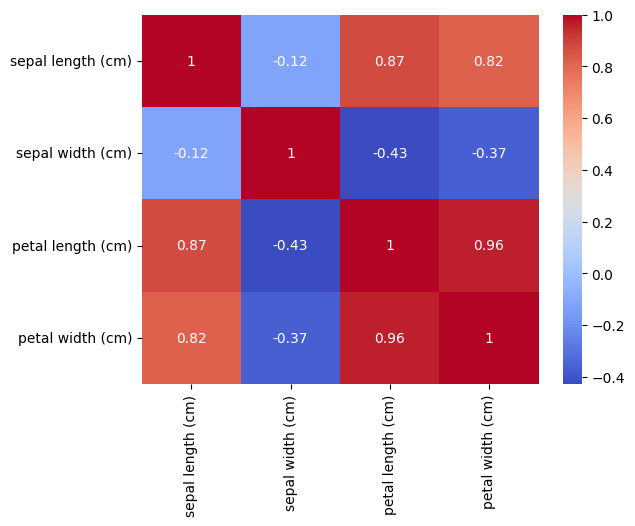

In [6]:
# Plot correlation matrix
corr_matrix = df_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

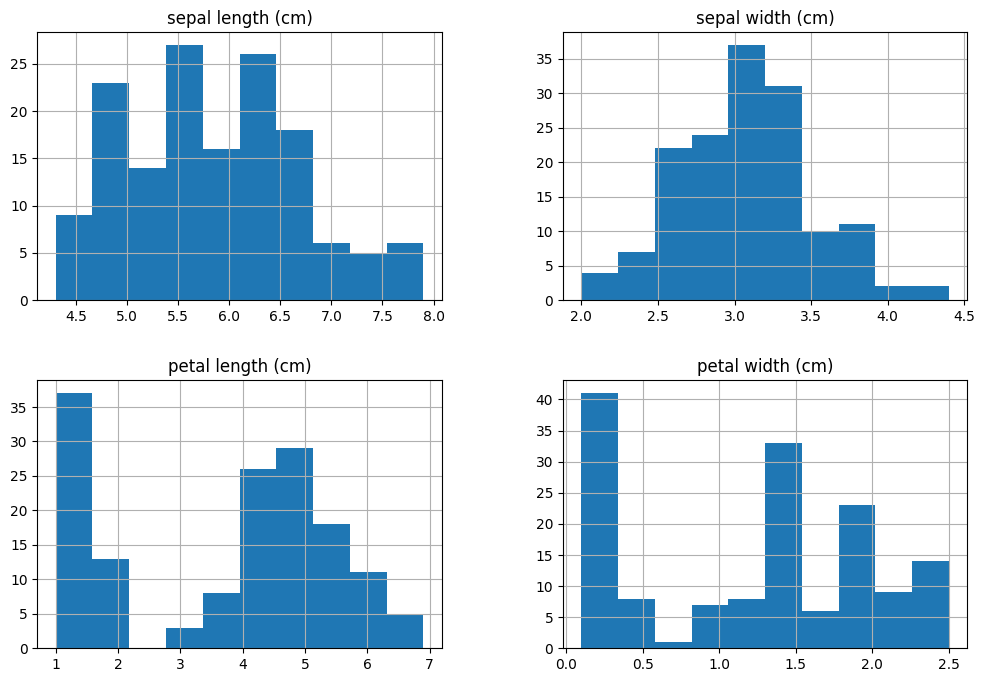

In [7]:
# Plot histograms of the features
df_features.hist(figsize=(12, 8))
plt.show()

In [8]:
description = df_features.describe()
print(description)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [9]:
for column in df_features.columns:
    data = description[[column]]
    mean = data.loc['mean'].values[0]
    std = data.loc['std'].values[0]
    min = data.loc['min'].values[0]
    max = data.loc['max'].values[0]
    print(f"{column}: ({min}-{max}), mean={mean:.2f}, std={std:.2f}")

sepal length (cm): (4.3-7.9), mean=5.84, std=0.83
sepal width (cm): (2.0-4.4), mean=3.06, std=0.44
petal length (cm): (1.0-6.9), mean=3.76, std=1.77
petal width (cm): (0.1-2.5), mean=1.20, std=0.76


In [10]:
# Understanding Labels
df_labels.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

## Binary Classification.

Let us first do a binary classification model for detecting if a observation belong to class-0 i.e. Setosa. We need to adjust the labels to be:
 - set to 1 if it is Setosa
 - set to 0 If it NOT setoa

 ### Prepare datasets
 Convert a column to Setosa (1) and not-setosa (0)

In [11]:
y_binary = (y == 0).astype(int) # 1 is setosa else 0
df_labels['binary_species'] = (df_labels['species'] == 0).astype(int)
test = df_labels['species'] == 0

df_labels.sample(5, random_state=310)

,species,binary_species
20,0,1
12,0,1
145,2,0
69,1,0
32,0,1


In [12]:
# Check oif the y_label is same as df_labels['binary_species']
np.array_equal(y_binary, df_labels['binary_species'].values)

True

In [13]:
# Apply label encoder (in this case will only do housekeeping)
# Registers the mapping: 0 → 0, 1 → 1 and use inverse_transform
# for consistency
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_binary)
np.array_equal(y_encoded, y_binary)

True

In [14]:
# Get test and train data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=282, stratify=y_encoded)

# Sklearn Logistic Regression

In [15]:
skl_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver='lbfgs', max_iter=10_000, tol=0.000001))
]).fit(X_train, y_train)

In [16]:
y_pred_skl = skl_pipeline.predict(X_test)
accuracy_score(y_test, y_pred_skl)

1.0

In [17]:
y_skl_pred_prob = skl_pipeline.predict_proba(X_test)

In [18]:
# Print model characterstics
model = skl_pipeline['clf']
print(f"Coef = {model.coef_}, intercept={model.intercept_}")
print(f"iterations = {model.n_iter_}")

Coef = [[-1.0118868   1.17937704 -1.68765346 -1.57912217]], intercept=[-2.39328471]
iterations = [13]


## MyLogisticRegression


In [19]:
my_pipeline = Pipeline([
    ("scalar", StandardScaler()),
    ("clf", MyLogisticRegression(alpha=0.01, max_iter=10_000_000, tol=0.0000001))
]).fit(X_train, y_train)

In [20]:
# Print model characterstics
model = my_pipeline['clf']
print(f"Coef = {model.coef_[1:]}, intercept={model.intercept_}")
print(f"tolerance = {model.training_tolerance:.8f}")
print(f"iterations={model.training_iter}")

Coef = [-2.34825266  4.43418014 -7.11840122 -6.80932102], intercept=-7.302685138554038
tolerance = 0.00000017
iterations=10000000


In [21]:
y_pred = my_pipeline.predict(X_test)

In [22]:
y_skl_pred_prob

array([[9.88636691e-01, 1.13633092e-02],
       [1.86731412e-02, 9.81326859e-01],
       [9.77919832e-01, 2.20801680e-02],
       [9.71871391e-01, 2.81286091e-02],
       [1.49701780e-02, 9.85029822e-01],
       [9.99154733e-01, 8.45266568e-04],
       [6.83903860e-02, 9.31609614e-01],
       [9.86212457e-01, 1.37875432e-02],
       [1.65911613e-02, 9.83408839e-01],
       [9.98217019e-01, 1.78298060e-03],
       [4.88610869e-03, 9.95113891e-01],
       [9.86568153e-01, 1.34318469e-02],
       [9.99817873e-01, 1.82126704e-04],
       [4.17626024e-03, 9.95823740e-01],
       [9.98844234e-01, 1.15576622e-03],
       [9.98412305e-01, 1.58769456e-03],
       [9.99473230e-01, 5.26770463e-04],
       [9.97981254e-01, 2.01874643e-03],
       [9.96905811e-01, 3.09418877e-03],
       [9.77474167e-01, 2.25258332e-02],
       [9.62102352e-01, 3.78976475e-02],
       [9.99151037e-01, 8.48962735e-04],
       [1.64143320e-02, 9.83585668e-01],
       [9.97694478e-01, 2.30552245e-03],
       [1.493929

In [23]:
match_skl_my = accuracy_score(y_pred_skl, y_pred)
acc_skl = accuracy_score(y_test, y_pred_skl)
acc_my = accuracy_score(y_test, y_pred)
print(f"SKL: {acc_skl:.4f}, MYM: {acc_my:.4f}, match: {match_skl_my:.4f}")

SKL: 1.0000, MYM: 1.0000, match: 1.0000
